In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 0. Problem biznesowy
Celem projektu jest klasteryzacja danych zebranych z czujników znajdjących się w smartfonach (akcelerometr, zyroskop, ...)

## 1. wczytanie i podział danych

In [2]:
data = pd.read_csv('../data/data.csv')

In [3]:
from sklearn.model_selection import train_test_split
our_data, validator_data = train_test_split(data, test_size=0.2, random_state=42)

## 2. wstepna analiza

In [4]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1



>mega duzo kolumn   
>kolumna subject to numer ochotnika - raczej nielegalne informacje, trzeba wywalić


In [5]:
data = data.drop('subject', axis=1)
our_data = our_data.drop('subject', axis=1)
validator_data = validator_data.drop('subject', axis=1)

In [6]:
our_data.to_csv('../data/our_data.csv', index=False)
validator_data.to_csv('../data/validator_data.csv', index=False)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 44.1 MB


In [8]:
data.shape

(10299, 561)

In [9]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.isna().sum().sum()

0

In [11]:
data.duplicated().sum()

0

In [12]:
data = our_data


>nie ma duplikatow, nie ma wartości NA


In [13]:
#columns with variances
for column in data.columns:
    print(column + ' variance: ' + str(data[column].var()))



tBodyAcc-mean()-X variance: 0.0044769421018401164
tBodyAcc-mean()-Y variance: 0.0013073837539268314
tBodyAcc-mean()-Z variance: 0.0027694192760906685
tBodyAcc-std()-X variance: 0.1925145874633604
tBodyAcc-std()-Y variance: 0.2500234056668236
tBodyAcc-std()-Z variance: 0.16317495619877742
tBodyAcc-mad()-X variance: 0.17104109761769018
tBodyAcc-mad()-Y variance: 0.23392930786117078
tBodyAcc-mad()-Z variance: 0.15925895593970477
tBodyAcc-max()-X variance: 0.28980073061210443
tBodyAcc-max()-Y variance: 0.0783974216221772
tBodyAcc-max()-Z variance: 0.08009845958439489
tBodyAcc-min()-X variance: 0.12626623345624427
tBodyAcc-min()-Y variance: 0.11516030415949183
tBodyAcc-min()-Z variance: 0.0851457185762241
tBodyAcc-sma() variance: 0.21282353332234252
tBodyAcc-energy()-X variance: 0.06130929887210224
tBodyAcc-energy()-Y variance: 0.015620590506499237
tBodyAcc-energy()-Z variance: 0.042629911965941326
tBodyAcc-iqr()-X variance: 0.12929907140304242
tBodyAcc-iqr()-Y variance: 0.13550404180670667

>moze usunąć, te kolumny, ktore mają 'małą' wariancję?

In [14]:
for column in data.columns:
    if data[column].var() < 0.005:
        print(column + ' variance: ' + str(data[column].var()))

tBodyAcc-mean()-X variance: 0.0044769421018401164
tBodyAcc-mean()-Y variance: 0.0013073837539268314
tBodyAcc-mean()-Z variance: 0.0027694192760906685
tGravityAcc-iqr()-X variance: 0.004823924624644773
fBodyAccJerk-bandsEnergy()-57,64 variance: 0.002714807081025747
fBodyAccJerk-bandsEnergy()-33,40.2 variance: 0.004995985986168579
fBodyGyro-bandsEnergy()-33,40.1 variance: 0.0034802287752631
fBodyGyro-bandsEnergy()-33,48.1 variance: 0.004216412026657845
fBodyGyro-bandsEnergy()-33,40.2 variance: 0.004348621931241796
fBodyGyro-bandsEnergy()-33,48.2 variance: 0.004563521776722529


>zadna z kolumn nie ma wariancji = 0, trudno stwierdzic czy warto usuwac

In [15]:
atributes = set()
static_methods = set()
for col in data.columns:
    atributes.add(col.split("-")[0])
    try:  
        static_methods.add(col.split("-")[1])
    except IndexError:
        continue

for atr in atributes:
    print(atr + "\n")

fBodyAccMag

tBodyGyroMag

angle(Z,gravityMean)

tBodyAcc

angle(tBodyGyroJerkMean,gravityMean)

fBodyAcc

fBodyBodyGyroMag

angle(Y,gravityMean)

angle(tBodyGyroMean,gravityMean)

tBodyGyroJerk

tGravityAcc

fBodyBodyGyroJerkMag

fBodyGyro

tBodyGyroJerkMag

tBodyGyro

tBodyAccJerkMag

angle(tBodyAccMean,gravity)

tBodyAccMag

fBodyBodyAccJerkMag

angle(tBodyAccJerkMean),gravityMean)

tBodyAccJerk

fBodyAccJerk

tGravityAccMag

angle(X,gravityMean)



In [16]:
for stat in static_methods:
    print(stat + "\n")

sma()

arCoeff()4

max()

arCoeff()3

meanFreq()

correlation()

arCoeff()

entropy()

min()

energy()

mad()

arCoeff()1

maxInds

std()

skewness()

iqr()

arCoeff()2

bandsEnergy()

kurtosis()

mean()



Patrzymy na rozkłady dla interesujących nas statystyk

In [17]:
stat = 'mean'
stat_cols = [col for col in data.columns if stat in col]

array([[<Axes: title={'center': 'tBodyAcc-mean()-X'}>,
        <Axes: title={'center': 'tBodyAcc-mean()-Y'}>,
        <Axes: title={'center': 'tBodyAcc-mean()-Z'}>,
        <Axes: title={'center': 'tGravityAcc-mean()-X'}>,
        <Axes: title={'center': 'tGravityAcc-mean()-Y'}>,
        <Axes: title={'center': 'tGravityAcc-mean()-Z'}>,
        <Axes: title={'center': 'tBodyAccJerk-mean()-X'}>],
       [<Axes: title={'center': 'tBodyAccJerk-mean()-Y'}>,
        <Axes: title={'center': 'tBodyAccJerk-mean()-Z'}>,
        <Axes: title={'center': 'tBodyGyro-mean()-X'}>,
        <Axes: title={'center': 'tBodyGyro-mean()-Y'}>,
        <Axes: title={'center': 'tBodyGyro-mean()-Z'}>,
        <Axes: title={'center': 'tBodyGyroJerk-mean()-X'}>,
        <Axes: title={'center': 'tBodyGyroJerk-mean()-Y'}>],
       [<Axes: title={'center': 'tBodyGyroJerk-mean()-Z'}>,
        <Axes: title={'center': 'tBodyAccMag-mean()'}>,
        <Axes: title={'center': 'tGravityAccMag-mean()'}>,
        <Axes: titl

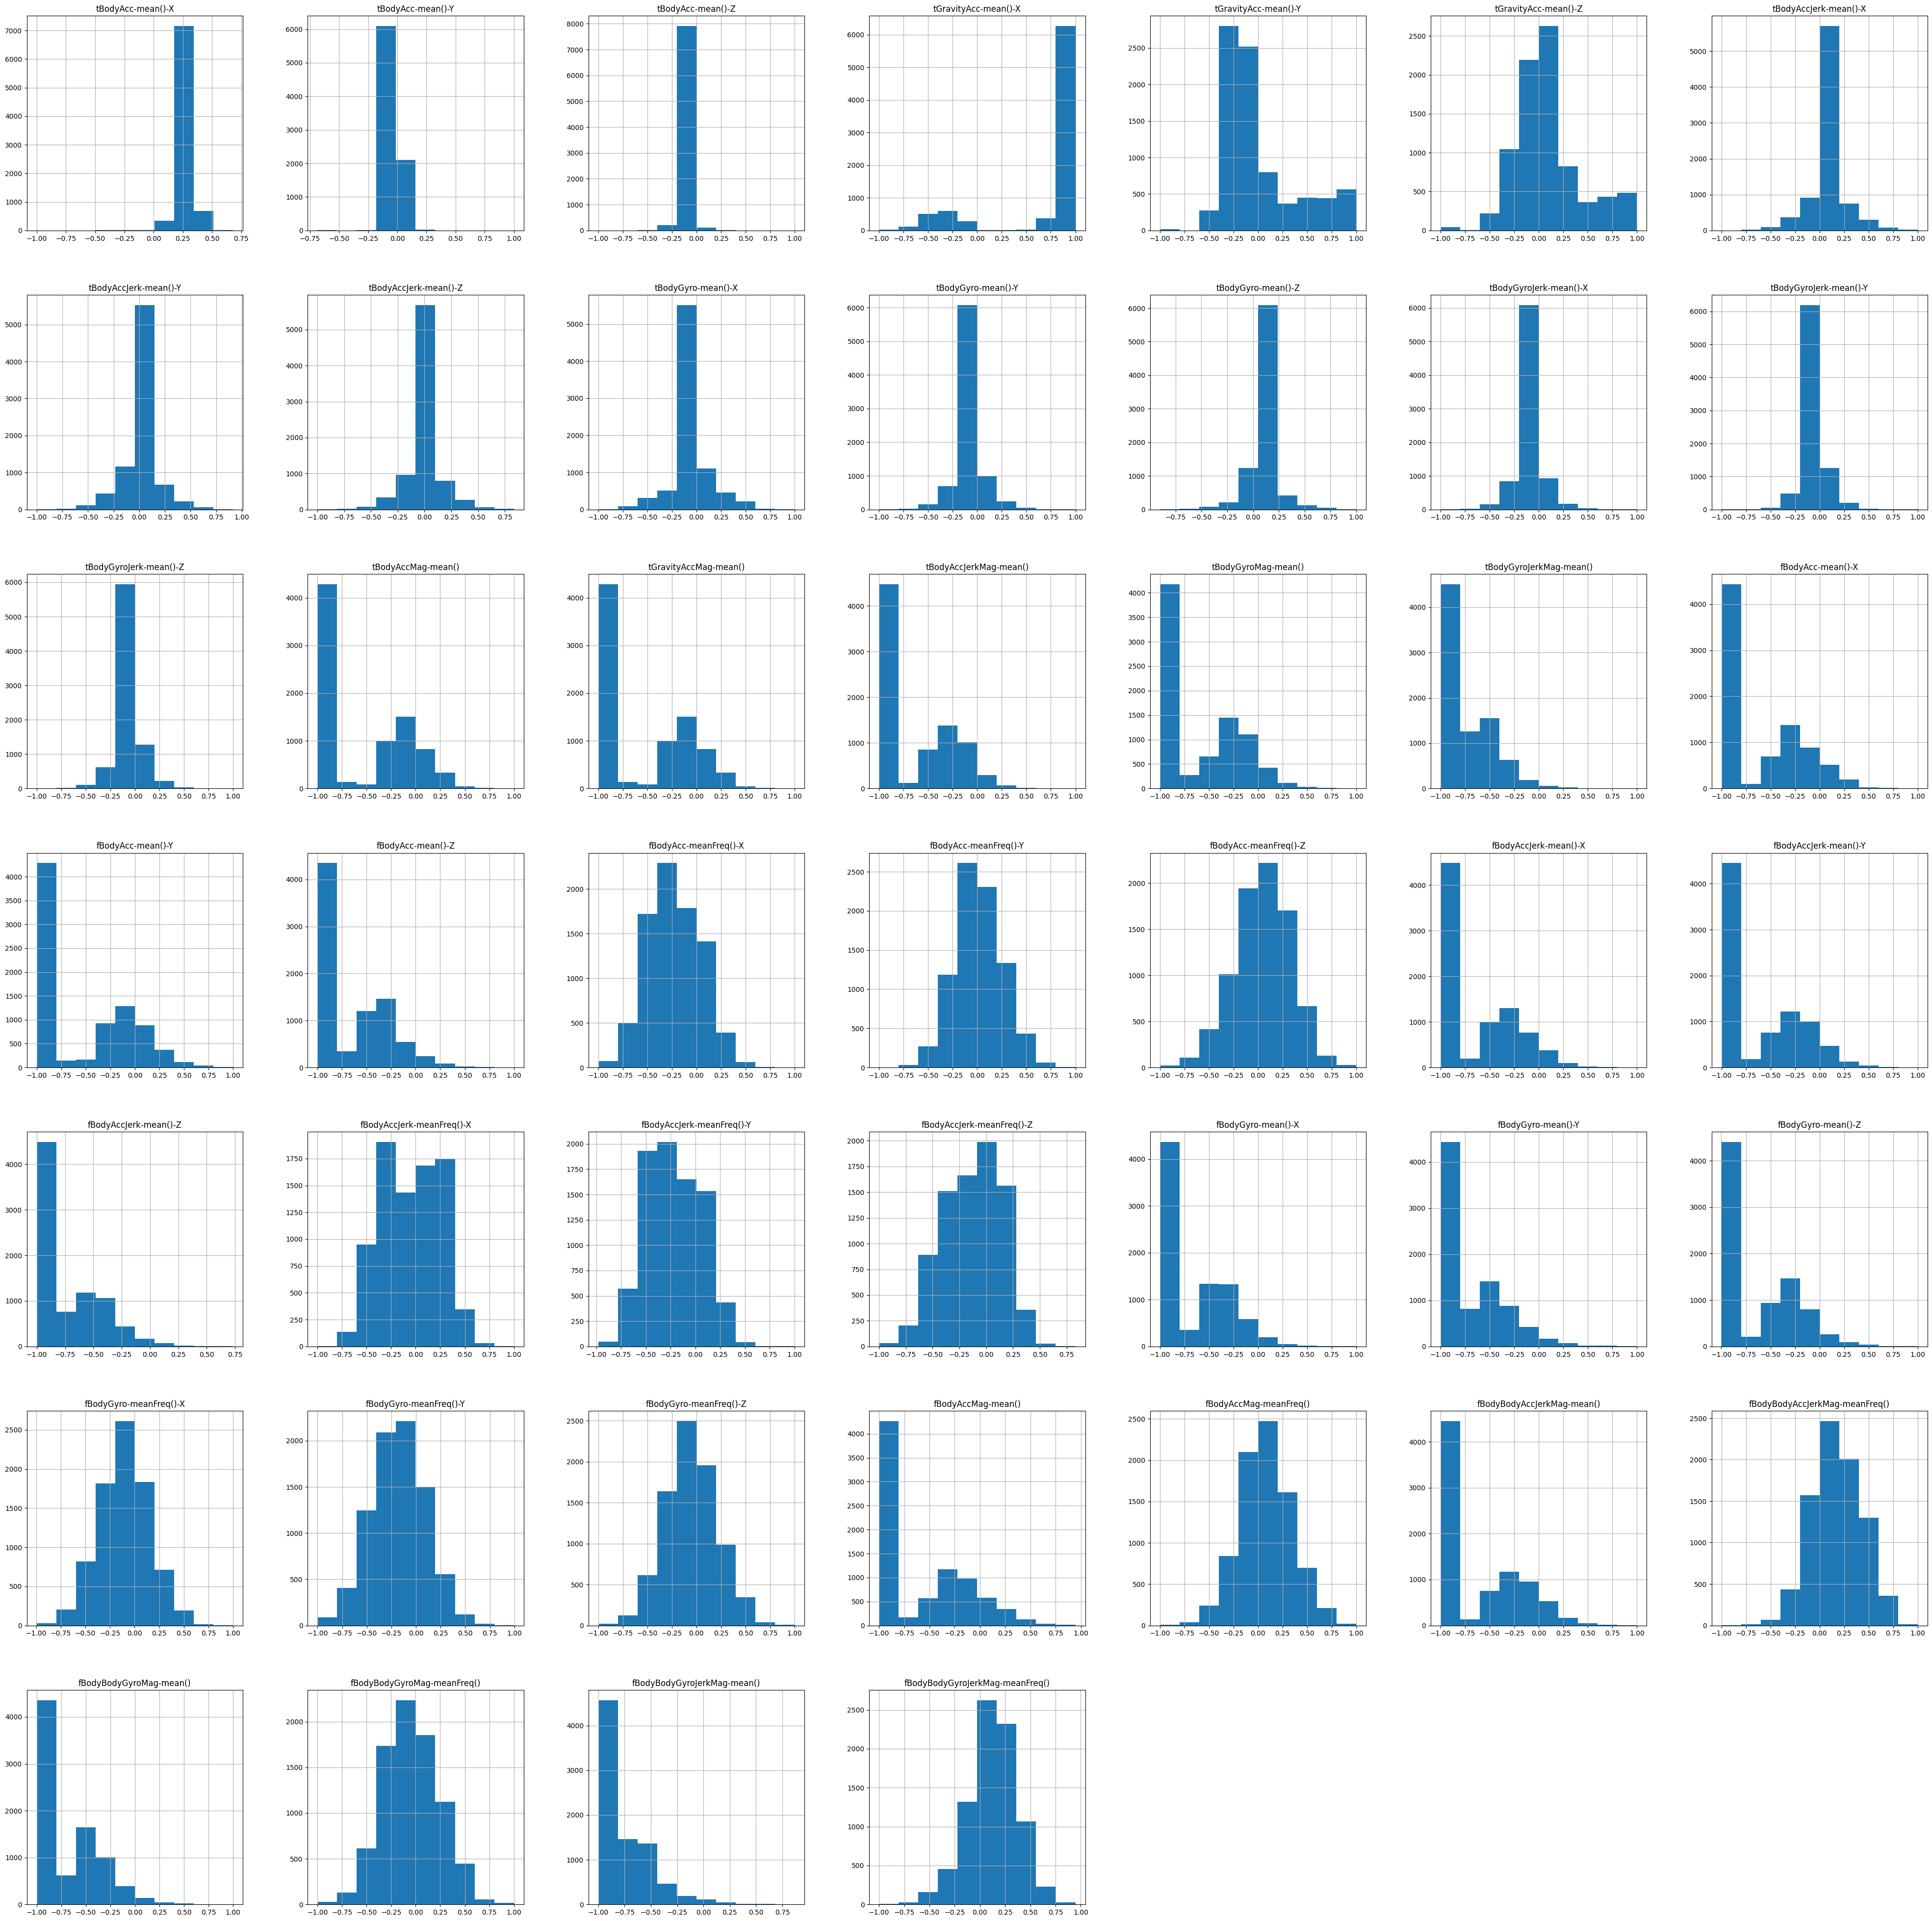

In [18]:
data[stat_cols].hist(figsize = (50,50))

> **WNIOSKI**

## 3. macierz korelacji

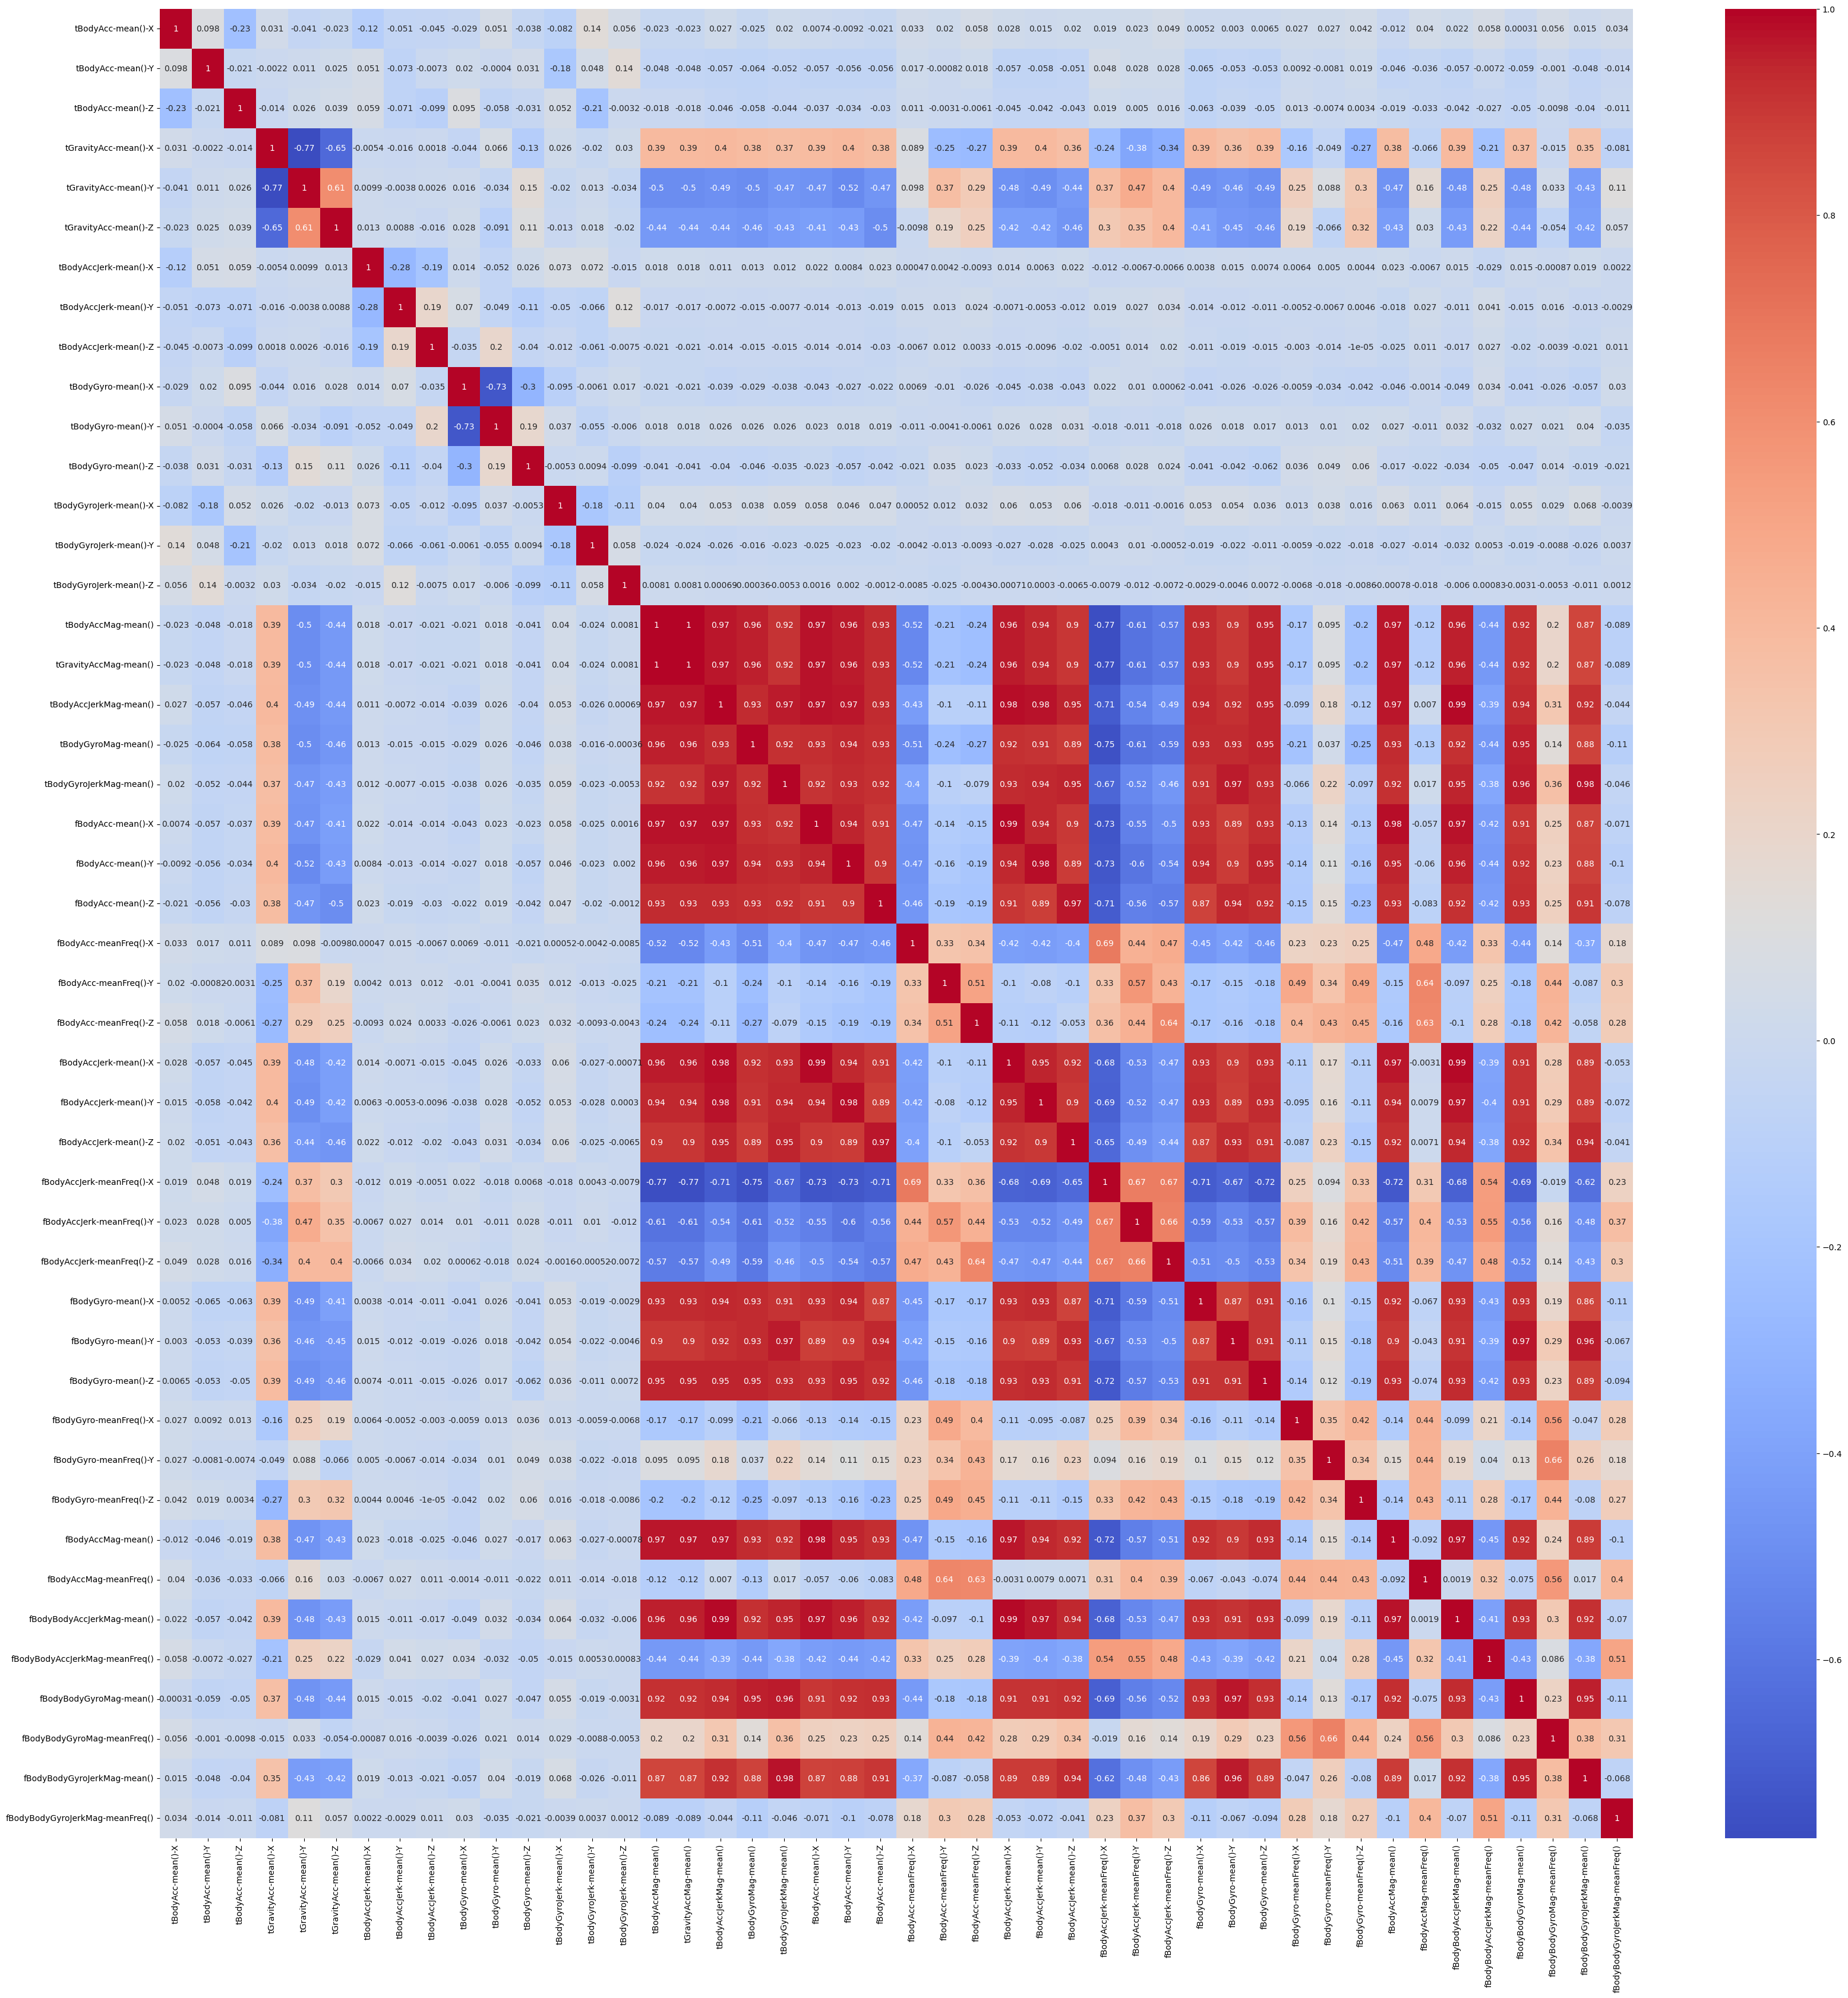

In [19]:
plt.figure(figsize=(40,40))
sns.heatmap(data[stat_cols].corr(),annot=True, cmap='coolwarm')

plt.show()

>**WNIOSKI** 


## 4. Pairplot

In [22]:

sns.pairplot(data[stat_cols])


In [ ]:
#save plot
plt.savefig('../plots/pairplot.png')

## 5. TSNE

<Axes: >

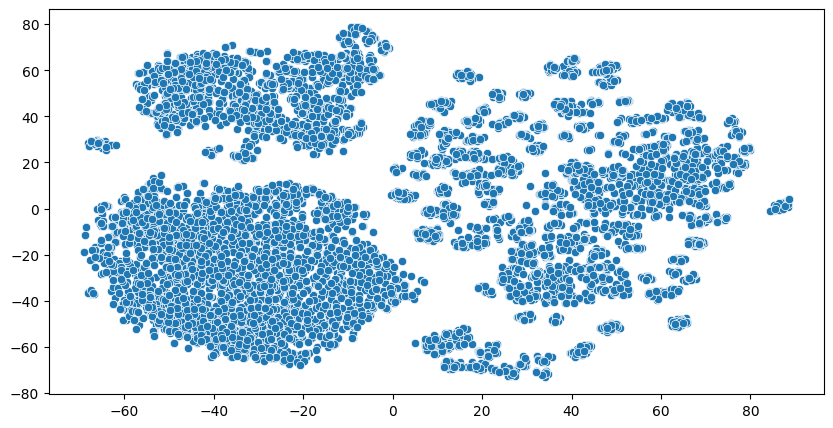

In [21]:
#tsne
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data)
#plot results 
plt.figure(figsize=(10,5))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1])


>widać cos na kształt klastra  
>tam po prawej troche 'ni pies ni wydra, cos na ksztalt świdra'

?Wgląd w kolumny, jakie informacje przechowują oraz jakie funkcje są na nich zastosowane